# 决策树的局限性

- 决策边界都是平行于坐标轴的直线（平面、超平面）。有时决策边界是不和坐标轴平行的，决策树的决策边界做不到。决策树的两端的误差可能非常离谱。

- 对个别的数据非常的敏感。

## 对数据敏感

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

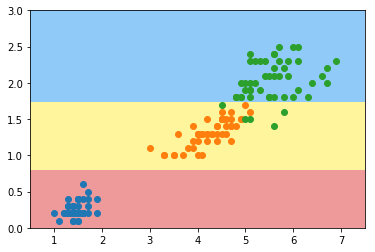

In [4]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [5]:
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138)

In [6]:
dt_clf2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

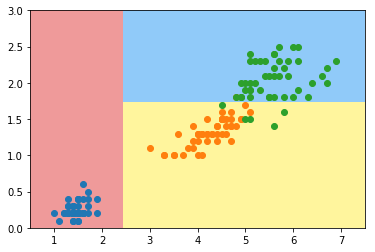

In [7]:
plot_decision_boundary(dt_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X_new[y_new==0, 0], X_new[y_new==0, 1])
plt.scatter(X_new[y_new==1, 0], X_new[y_new==1, 1])
plt.scatter(X_new[y_new==2, 0], X_new[y_new==2, 1])
plt.show()